In [3]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract historical market data with the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to convert the Date index into a column
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the HTML content
html_data = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Extract the Tesla Revenue table using read_html or BeautifulSoup
tables = pd.read_html(str(soup))
tesla_revenue = tables[0]  # Assuming the first table contains the revenue data

# Rename columns to "Date" and "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

# Step 4: Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# Remove null or empty values
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Step 5: Display the last five rows
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [5]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical market data with the maximum available period
gme_data = gme_ticker.history(period="max")

# Reset the index to convert the Date index into a column
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Save the HTML content
html_data_2 = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Extract the GameStop Revenue table using read_html or BeautifulSoup
tables = pd.read_html(str(soup))
gme_revenue = tables[0]  # Assuming the first table contains the revenue data

# Rename columns to "Date" and "Revenue"
gme_revenue.columns = ["Date", "Revenue"]

# Step 4: Clean the Revenue column by removing commas and dollar signs
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# Remove null or empty values
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Step 5: Display the last five rows
print(gme_revenue.tail())

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


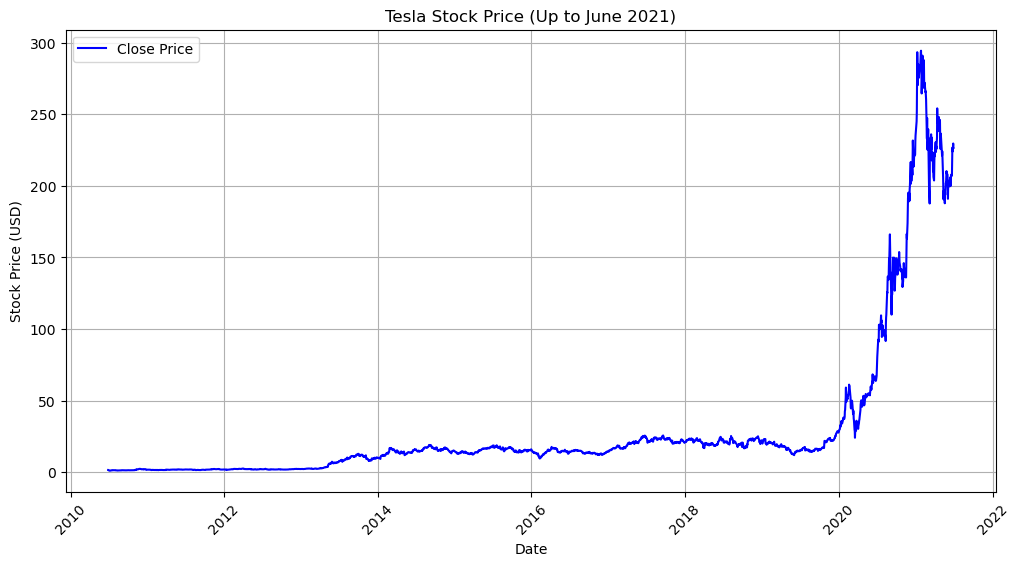

In [7]:
import matplotlib.pyplot as plt

# Define the function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="Close Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data["Date"] <= "2021-06-30"]

# Plot the Tesla stock data
make_graph(tesla_data_filtered, "Tesla Stock Price (Up to June 2021)")

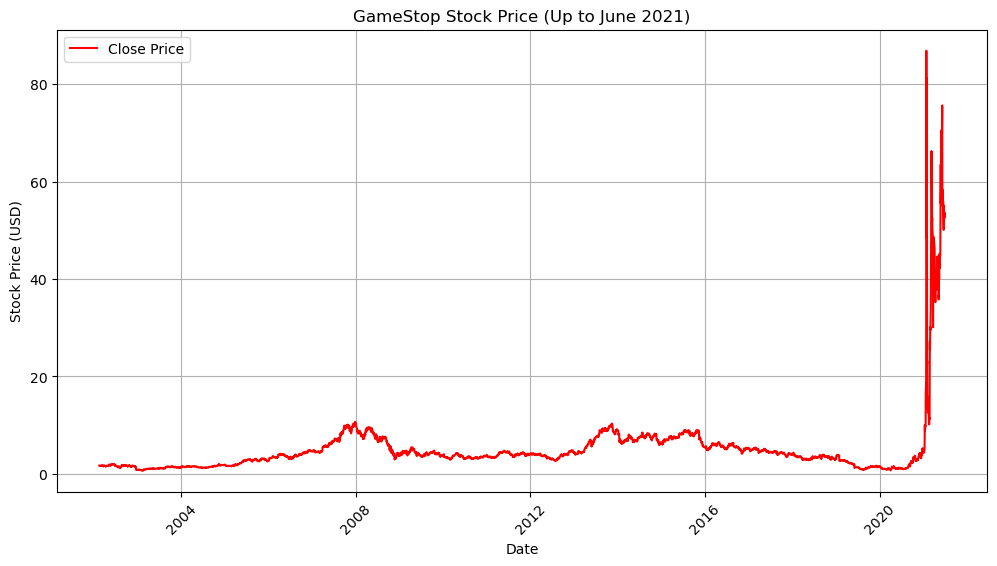

In [12]:
import matplotlib.pyplot as plt

# Define the function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="Close Price", color="red")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Filter GameStop data up to June 2021
gme_data_filtered = gme_data[gme_data["Date"] <= "2021-06-30"]

# Plot the GameStop stock data
make_graph(gme_data_filtered, "GameStop Stock Price (Up to June 2021)")